In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [40]:
data = pd.read_csv('/content/housing (1).csv')

In [41]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [43]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [44]:
data.total_bedrooms.fillna(data.total_bedrooms.mean(), inplace=True)

In [45]:
data.dropna(inplace=True)

In [46]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [47]:
nom_data = data.select_dtypes(include=["number"])
cat_data = data.select_dtypes(include=["object"])

In [48]:
import urllib.request
import io
import matplotlib.image as mpimg

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
with urllib.request.urlopen(url) as url_request:
    image_data = url_request.read()

image_data = io.BytesIO(image_data)
california_img = mpimg.imread(image_data,format='png')

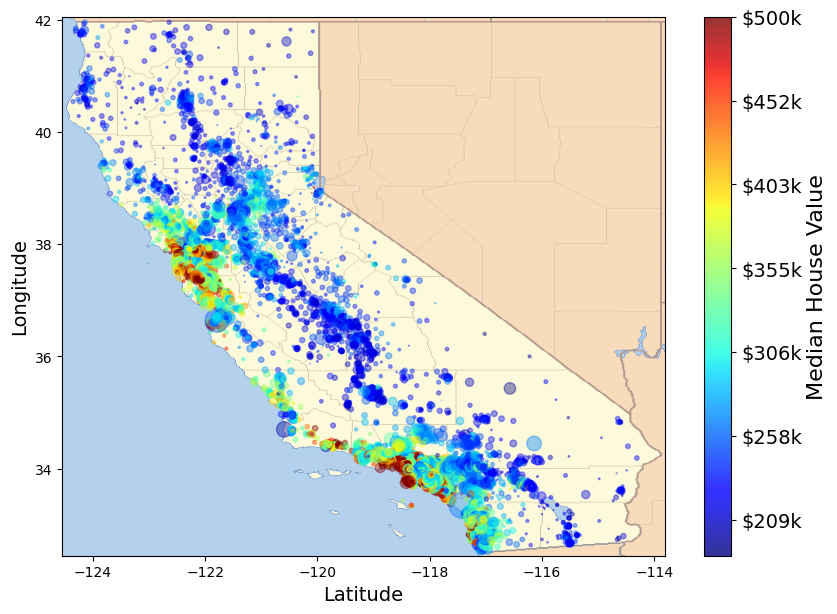

In [49]:
ax = data.plot(kind='scatter', x='longitude',y='latitude', figsize=(10,7),s=data['population']/100,
                  c='median_house_value',colorbar=False,cmap=plt.get_cmap('jet'),alpha=0.4)

plt.imshow(california_img,alpha=0.8, extent=[-124.55, -113.80, 32.45, 42.05], cmap=plt.get_cmap('jet'))
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('Longitude',fontsize=14)

prices = data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
#plt.legend(fontsize=16)

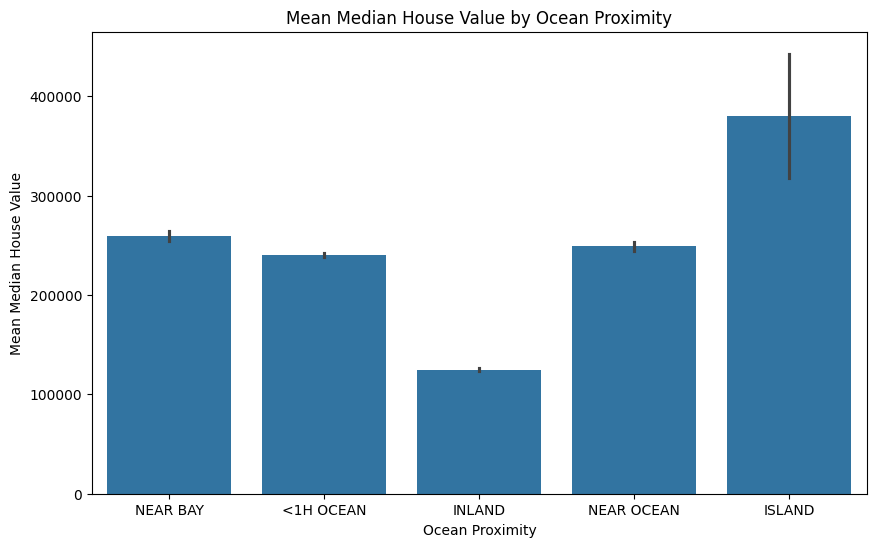

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Mean Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Mean Median House Value')
plt.show()

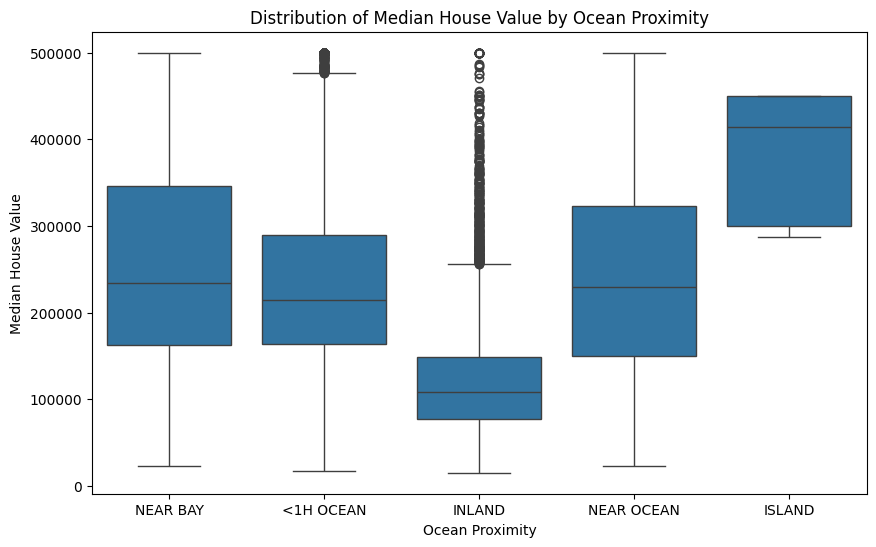

In [51]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()


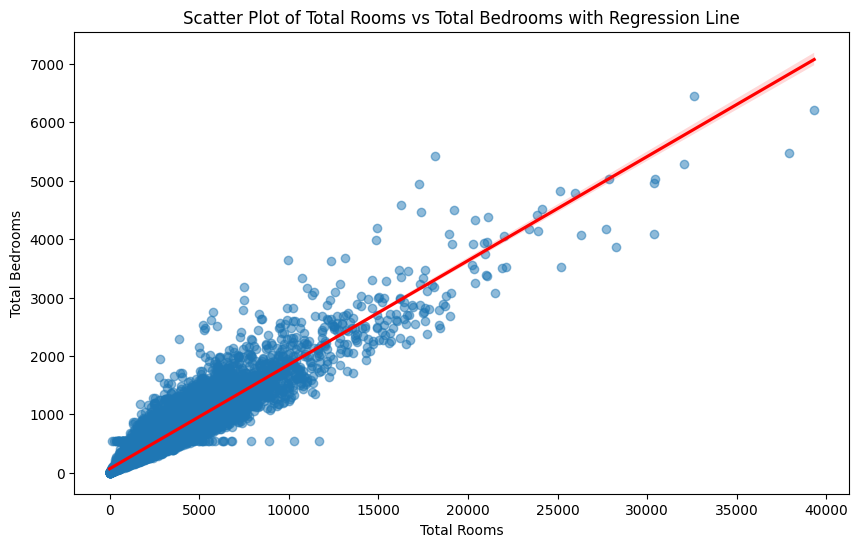

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(x='total_rooms', y='total_bedrooms', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Total Rooms vs Total Bedrooms with Regression Line')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

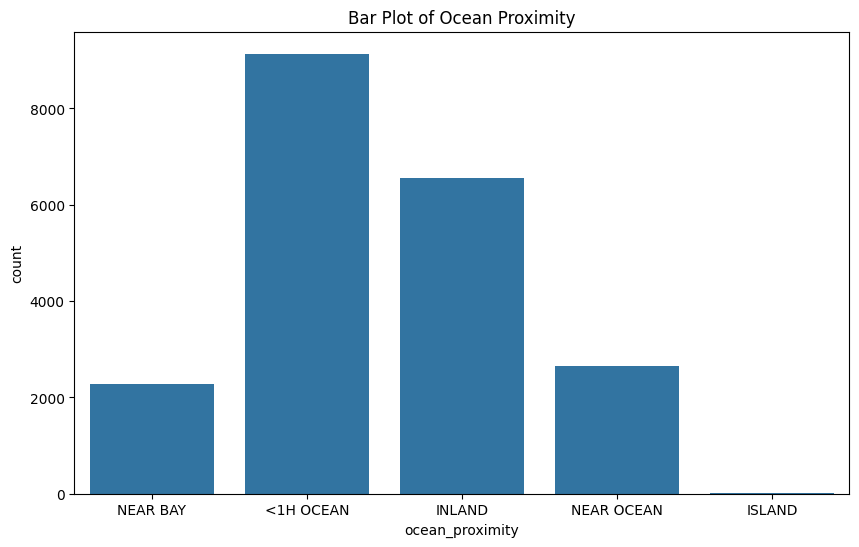

In [53]:

plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=data)
plt.title('Bar Plot of Ocean Proximity')
plt.show()

In [54]:
ocean_proximity_counts = data['ocean_proximity'].value_counts()
ocean_proximity_counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2281
ISLAND           5
Name: count, dtype: int64

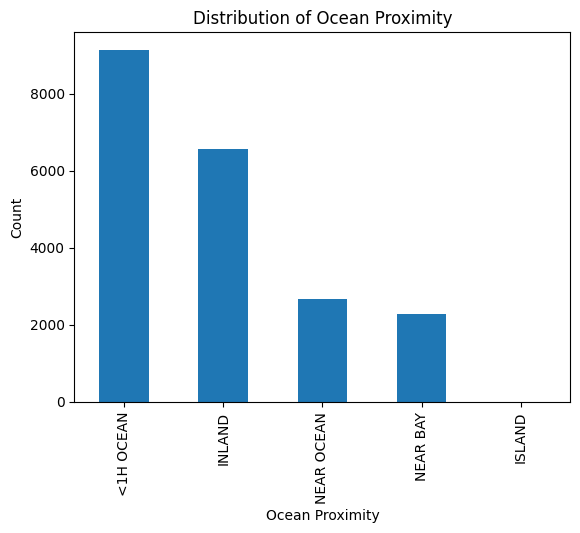

In [55]:
ocean_proximity_counts.plot(kind='bar')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

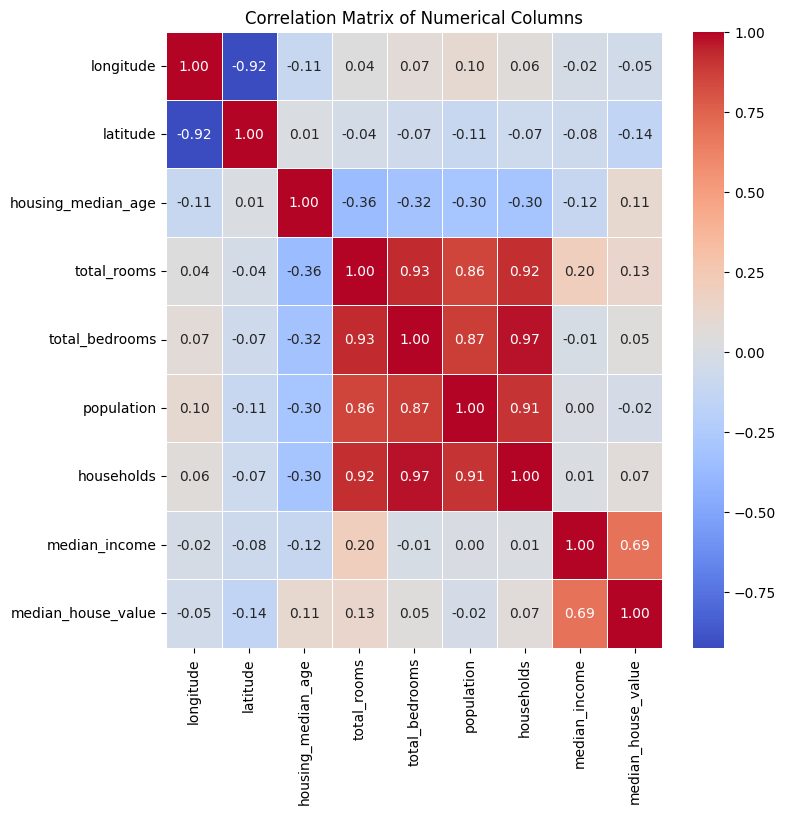

In [56]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]

correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [57]:
# data['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'] , [0, 1, 2, 3, 4] , inplace=True)
from sklearn.preprocessing import LabelEncoder
data["ocean_proximity"] = LabelEncoder().fit_transform(data["ocean_proximity"])


In [58]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# data["ocean_proximity"] = encoder.fit_transform(data[["ocean_proximity"]])

In [59]:
x = data.drop('ocean_proximity', axis=1)
y = data['ocean_proximity']

In [60]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0
5,-122.25,37.85,52,919,213.0,413,193.0,4.0368,269700.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0


In [61]:
y

0        3
1        3
2        3
3        3
5        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20631, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,-1.328655,1.053019,0.983477,-0.804745,-0.975177,-0.974449,-0.976923,2.344211,2.129344
1,-1.323662,1.043655,-0.606533,2.045429,1.354752,0.861114,1.669616,2.331685,1.313993
2,-1.333647,1.038973,1.857983,-0.535722,-0.829705,-0.820824,-0.843550,1.782223,1.258539
3,-1.338639,1.038973,1.857983,-0.624174,-0.722390,-0.766083,-0.733713,0.932610,1.164960
4,-1.338639,1.038973,1.857983,-0.786871,-0.774856,-0.894105,-0.801707,0.087207,0.544565
...,...,...,...,...,...,...,...,...,...
20626,-0.759546,1.802130,-0.288531,-0.444978,-0.390906,-0.512689,-0.443431,-1.216186,-1.115597
20627,-0.819452,1.806812,-0.845035,-0.888614,-0.925097,-0.944430,-1.008304,-0.691723,-1.124262
20628,-0.824444,1.778720,-0.924535,-0.175039,-0.126196,-0.369658,-0.174070,-1.142661,-0.992558
20629,-0.874366,1.778720,-0.845035,-0.355610,-0.307439,-0.604511,-0.393743,-1.054663,-1.058410


In [63]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# x = pd.DataFrame(x)
# x

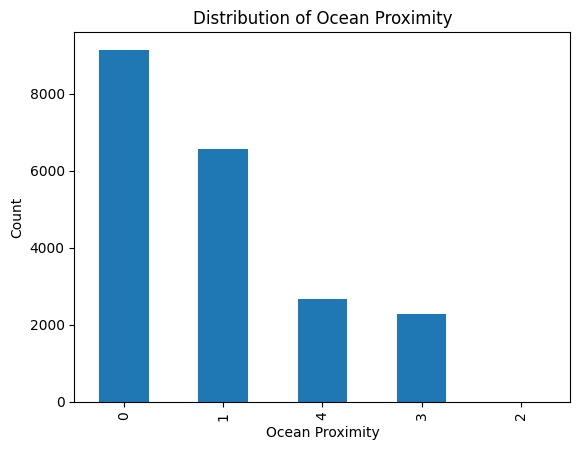

In [64]:
ocean_proximity_counts = data['ocean_proximity'].value_counts()
ocean_proximity_counts.plot(kind='bar')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

In [65]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(k_neighbors=4)
# x_resampled, y_resampled = smote.fit_resample(x, y)
# y_resampled.value_counts()

In [66]:
x=data.drop('median_house_value',axis=1)
y=data['median_house_value']

In [67]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
5        269700.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20631, dtype: float64

In [68]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,3
5,-122.25,37.85,52,919,213.0,413,193.0,4.0368,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,1


In [69]:
# prompt: linear regression
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



x_train shape: (16504, 9)
x_test shape: (4127, 9)
y_train shape: (16504,)
y_test shape: (4127,)


In [74]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

y_test_pred = model.predict(x_test)


mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)


mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train}")
print(f"Training R^2 Score: {r2_train}")

print(f"Testing RMSE: {rmse_test}")
print(f"Testing R^2 Score: {r2_test}")


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Training RMSE: 69326.80876538446
Training R^2 Score: 0.6390063287073623
Testing RMSE: 71017.108310362
Testing R^2 Score: 0.6220018516307346
Coefficients: [-4.28464723e+04 -4.28465110e+04  1.10517737e+03 -6.22421941e+00
  7.74659093e+01 -4.08077292e+01  8.30564031e+01  3.94400620e+04
  2.73507556e+02]
Intercept: -3583022.7031413903
